# Statistics (Part 1): 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
# this is for some custom plot layouts
import matplotlib.gridspec as gridspec

# Demo 1: histograms  

Loading Hvitarvant total carbon record (%TC):   
 - First column is dated calendar year BP  
 - Second column is percent total carbon  

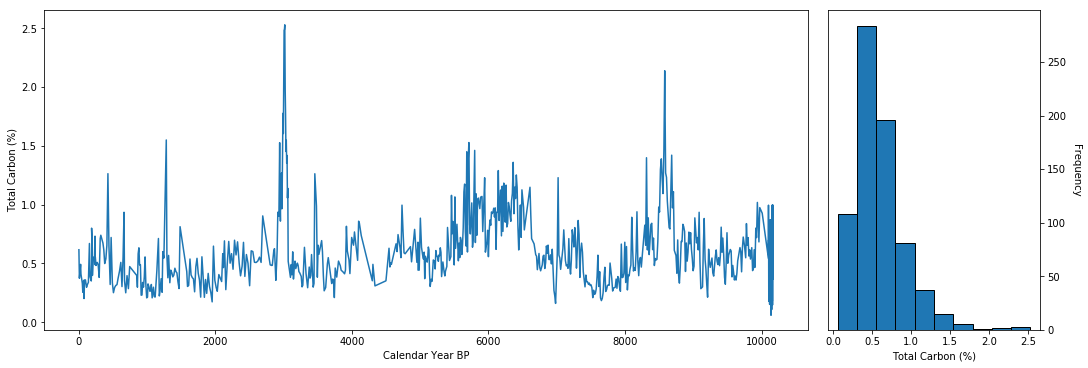

In [2]:
# Calendar year BP 
calyr = np.loadtxt('Hvitarvatn_TC.dat')[:,0]
# Percent total carbon 
TC    = np.loadtxt('Hvitarvatn_TC.dat')[:,1]

########################
# Create a figure 
########################
fig0  = plt.figure(figsize=(15,5),constrained_layout=True)
# Create a spec instacen which has 3 columns and 1 row
spec0 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig0)
# Create axes 1, which spans the first two columns
ax1   = fig0.add_subplot(spec0[0:2])
# Create axes 3, which spans the final column
ax2   = fig0.add_subplot(spec0[2])

########################
# subplot one 
########################
# plot the loaded data on the right axes
ax1.plot(calyr,TC)   
# add a xlabel to right axes
ax1.set_xlabel('Calendar Year BP')
# add a ylabel to right axes
ax1.set_ylabel('Total Carbon (%)')

########################
# subplot two 
########################
# plot a histogram of data, assign returned value to place holder (_)
_ = ax2.hist(TC,edgecolor='black')
# add a xlabel to right axes
ax2.set_xlabel('Total Carbon (%)')
# Put the y-axis of the second subplot on the right to decrease clutter
ax2.yaxis.tick_right()
# add a ylabel to right axes
ax2.set_ylabel('Frequency',rotation=270,labelpad=15)
ax2.yaxis.set_label_position("right")

Practical guideline: 


In [3]:
nbin = np.round(np.sqrt(TC.shape[0])).astype(int)

Text(0, 0.5, 'Total Carbon (%)')

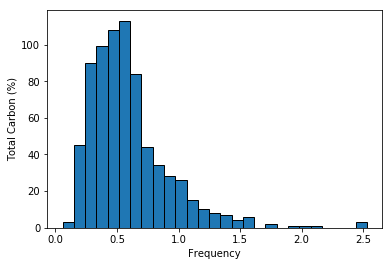

In [4]:
# plot the loaded data 
plt.hist(TC,nbin,edgecolor='black')   
# add a xlabel 
plt.xlabel('Frequency')
# add a ylabel
plt.ylabel('Total Carbon (%)')

In [5]:
# Retrieve frequency vector (TC_freq) and left bins edges (TC_bins)
# TC_bins will N+1, where the first N elements are left edges, and final 
# N+1 is the right edge of the last bin
TC_freq, TC_bins = np.histogram(TC)


# We typically want bin ceneters, which can be found by adding a half 
# bin-width for the first N edges of TC_bins

# Calculate half-width
half_width = (TC_bins[1] - TC_bins[0]) / 2
# Add half-width to first N bins
TC_bins    = TC_bins[:-1] + half_width

There are lots of ways to manually calculate a CDF, we demonstrate three with increasing levels of sophistication. 

Text(0, 0.5, 'Cumulative frequency')

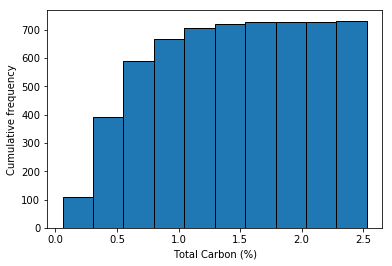

In [6]:
#############################################
# Method 1: brute-force via nested for looop
#############################################

TC_sorted = np.sort(TC)

# Create empty array to store cummulative frequencies
CDF1 = np.zeros_like(TC_freq)

for i in range(len(TC_bins)): 
    for j in range(len(TC_sorted)): 
        if (TC_sorted[j] > TC_bins[i]+half_width):
            # don't forget python is zero indexed
            k = j
            break
    CDF1[i] = len(TC_sorted[0:k])
    
    if i == len(TC_bins)-1: 
        # Becuase python is no inclusive we have to manual write the final value 
        CDF1[i] = len(TC_sorted)

#############################################
# Method 2: for loop and sum function 
#############################################
# Create empty array to store cummulative frequencies
CDF2 = np.zeros_like(TC_freq)

for i in range(len(TC_bins)):
    CDF2[i] = TC_freq[0:i+1].sum()

    
#############################################
# Method 3: a one liner!!
#############################################    
CDF3 = TC_freq.cumsum()


#############################################
# Check that they are all similar
#############################################  
# Nothing happens is condition is true, i.e. all the values from the 
# respective CDFs are close. An Error will be raised if condition is false
assert np.allclose(CDF1,CDF2)
assert np.allclose(CDF2,CDF3)

# plot the CDF
plt.bar(TC_bins,CDF1,width=half_width*2,edgecolor='k')
plt.xlabel('Total Carbon (%)')
plt.ylabel('Cumulative frequency')

__Note__: `assert` statements are useful control flow statements, when things HAVE to be true. They are different than `if` statements, because `if`s are conditional, they can be followed by `elif`s or `else`. BUT, if the condition following `assert` is false, the WHOLE script (or notebook) will stop. So use `assert` sparingly, if you're new to programing don't even worry about it. 

# Demo 2: Measures of central tendency  

In [7]:
# Mean 
print('manual: {:.6f}'.format(np.sum(TC)/TC.shape[0]))
TC_mean = np.mean(TC)
print('numpy:  {:.6f}'.format(TC_mean))

manual: 0.595645
numpy:  0.595645


In [19]:
# Median 

# Sort the data
TC_sorted = np.sort(TC[:-1])
# Get the length
TC_length = TC_sorted.shape[0]

# Check is lenght is even, if so will need to take the mean on N and N+1
# but, becuase of python indexing this will be N - 1 and N
if TC_length % 2 == 0: 
    TC_median = np.mean([TC_sorted[int(TC_length/2) - 1], TC_sorted[int(TC_length/2)]])
    print('manual (even) {:.6f}'.format(TC_median))
elif TC_length % 2 != 0:
    TC_median = np.mean(TC_sorted[int(TC_length/2)])
    print('manual (odd)  {:.6f}'.format(TC_median))
    
print('numpy         {:.6f}'.format(np.median(TC_sorted)))

manual (odd)  0.533200
numpy         0.533200


In [9]:
TC_length/2

365.5

In [10]:
# Mode

# For the 'mode' as in statistics, we must compute it from the histogram, 
# not the raw data using .mode()

# We've got to way to calcuating the mode from the frequnecy info from avove 

# Method One: Boolean Indexing
TC_mode = TC_bins[TC_freq == max(TC_freq)]
print('Mode (method 1): {:.6f}'.format(*TC_mode))   

# Method two: argmax and index
TC_mode = TC_bins[TC_freq.argmax()]
print('Mode (method 2): {:.6f}'.format(TC_mode))   

Mode (method 1): 0.429040
Mode (method 2): 0.429040


# Demo 3: Measures of variation  

In [11]:
import scipy.stats as sts

print('Hvitarvant Data')
print('---------------')
print('Variance:  {:+.3f}'.format(np.var(TC)))
print('Std. Dev.: {:+.3f}'.format(np.std(TC)))
print('Skew:      {:+.3f}'.format(sts.skew(TC)))
print('Kurtosis:  {:+.3f}'.format(sts.kurtosis(TC)))

# compare values to standard normal distribution  
z_rand = np.random.randn(5000)

print('\nRandom Data')
print('---------------')
print('Variance:  {:+.3f}'.format(np.var(z_rand)))
print('Std. Dev.: {:+.3f}'.format(np.std(z_rand)))
print('Skew:      {:+.3f}'.format(sts.skew(z_rand)))
print('Kurtosis:  {:+.3f}'.format(sts.kurtosis(z_rand)))


Hvitarvant Data
---------------
Variance:  +0.106
Std. Dev.: +0.326
Skew:      +1.900
Kurtosis:  +6.092

Random Data
---------------
Variance:  +1.035
Std. Dev.: +1.017
Skew:      +0.078
Kurtosis:  +0.059


# Demo 4: Standardizing a data distribution 

Text(0, 0.5, 'Frequency')

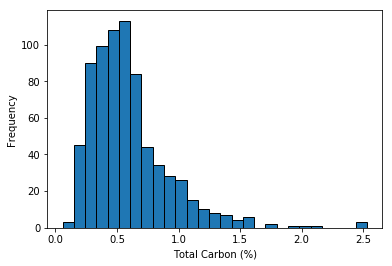

In [12]:
# recall: 
nbin = np.round(np.sqrt(TC.shape[0])).astype(int)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(TC,nbin,edgecolor='black')
# add a xlabel to axes
ax.set_xlabel('Total Carbon (%)')
# add a ylabel to axes
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

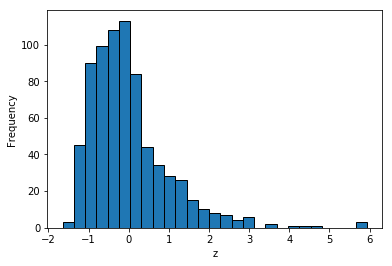

In [13]:
# Recompute mean and std. 
TC_mean = np.mean(TC)
TC_std = np.std(TC)

# Define standard variate z
z = (TC-TC_mean)/TC_std;
  
fig, ax = plt.subplots()
z_freq, z_bins, patches = ax.hist(z,nbin,edgecolor='black')
# add a xlabel to axes
ax.set_xlabel('z')
# add a ylabel to axes
ax.set_ylabel('Frequency')

Text(0, 0.5, 'f(z)')

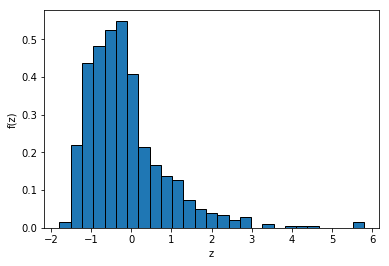

In [14]:
bin_size = z_bins[1] - z_bins[0]
# normalize distribution so that integral = 1:  
hist_area = np.sum(np.abs(z_freq*bin_size))
f = z_freq/hist_area

# confirm area under curve = 1, 
# Nothing happens is condition is true, i.e. area under curve close to 1.0
# An Error will be raised if condition is false
assert np.isclose(1.0, np.sum( np.abs( bin_size*f ) ))

fig, ax = plt.subplots()

ax.bar(z_bins[:-1],f,width=bin_size,edgecolor='k')
# add a xlabel to axes
ax.set_xlabel('z')
# add a ylabel to axes
ax.set_ylabel('f(z)')

# Demo 5: Central Limit Theorem  

In [15]:
np.random.seed(999)
xrand = np.random.rand(10000,1)

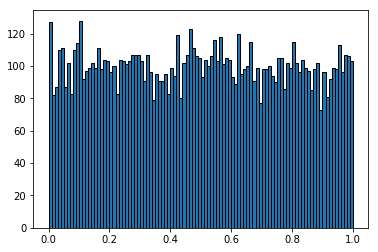

In [16]:
n, bins, patches = plt.hist(xrand,100,edgecolor='black')

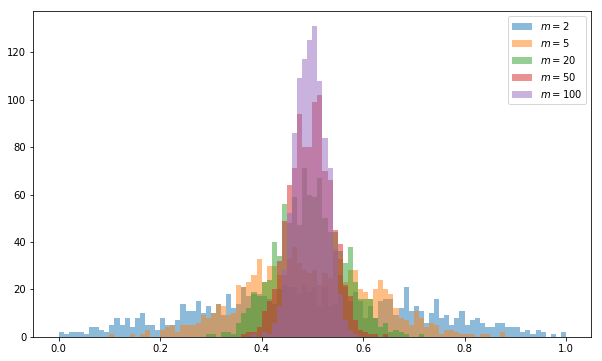

In [17]:
np.random.seed(999)

fig, ax = plt.subplots(figsize=(10,6))

# Choose number of sample
for m in [2, 5, 20, 50, 100]:
    # Create an empty array to store means
    x_mean_CLT = np.zeros(1000)
    # Calculate mean 100 times from m random samples of the distribution
    for i in range(0,1000):
        # Random Sample index, make sure the are intergers
        sample_idx = np.ceil(xrand.shape[0]*np.random.rand(1,m)).astype(int)
        # Calculate mean of random vector at our indexes 
        # (minus one, becuase python is 0 indexes)
        x_mean_CLT[i] = np.mean(xrand[sample_idx-1])
    # Plot a histogram for a given sample size
    # Make the plot slightly transparent to aid visualization
    ax.hist(x_mean_CLT,bins,alpha=0.5,label='$m = ${}'.format(m))
ax.legend()